In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.select_dtypes(include='object').nunique()

species    3
island     3
sex        3
dtype: int64

In [4]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [5]:
df.drop(df[df['sex']=='.'].index, inplace=True)

<Axes: xlabel='species', ylabel='count'>

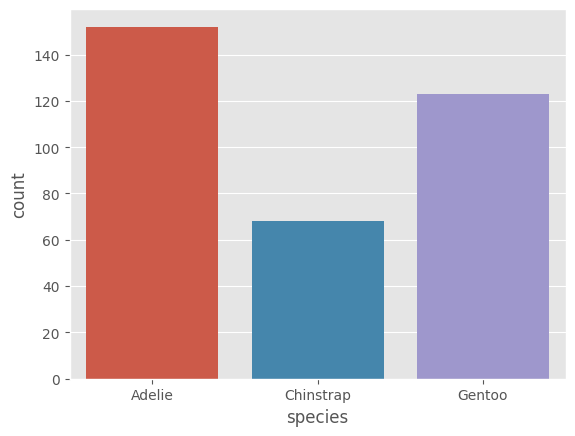

In [6]:
sns.countplot(x='species', data=df)

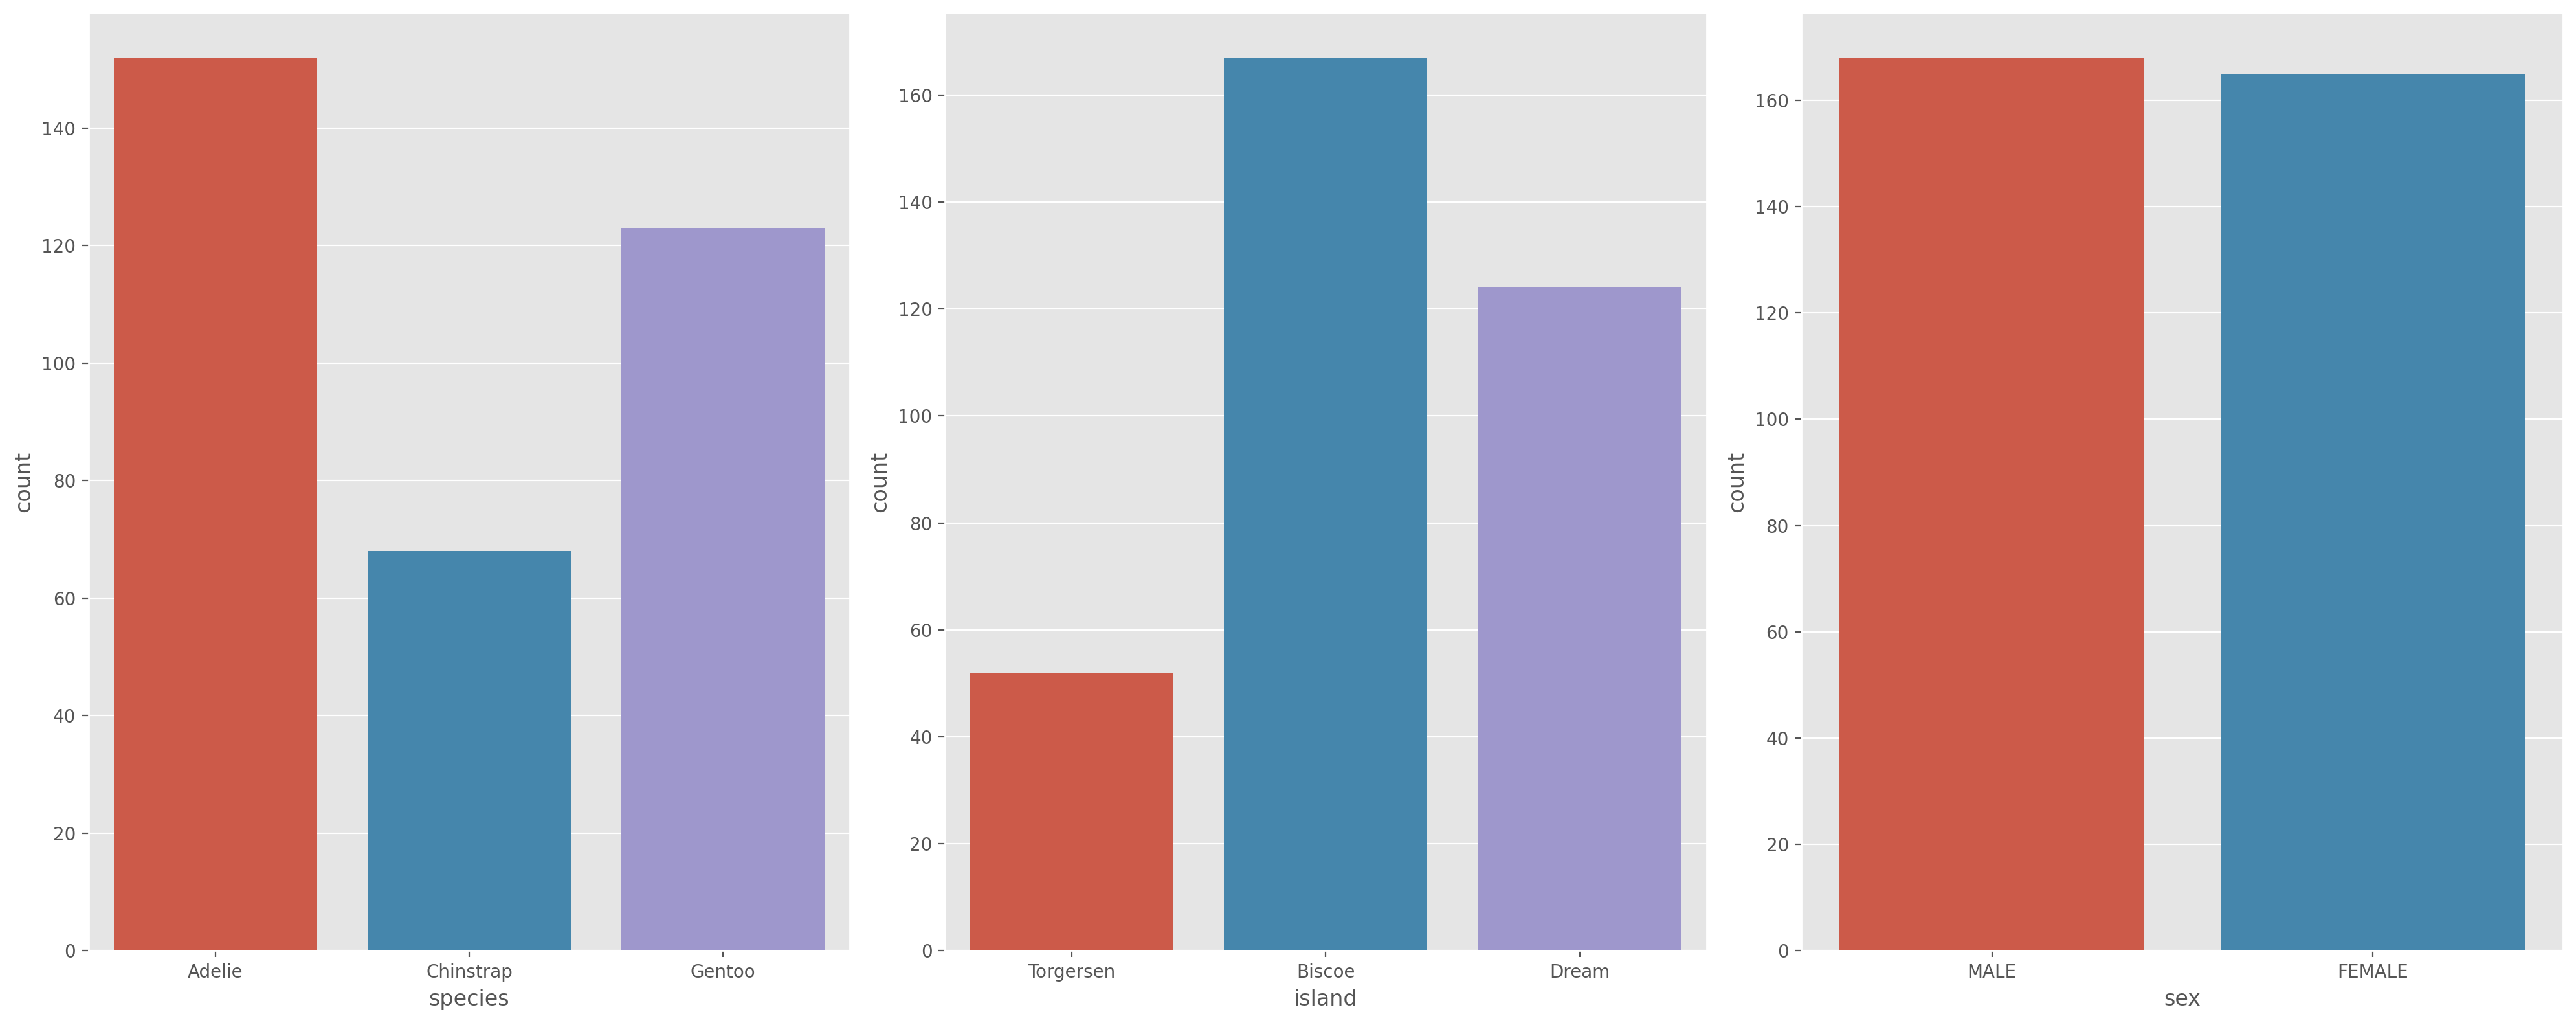

In [7]:
cols = ['species', 'island', 'sex']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), dpi=200)
ax = ax.flatten()

for i, var in enumerate(cols):
    sns.countplot(x=var, data=df, ax=ax[i])
    
fig.tight_layout()

plt.show()

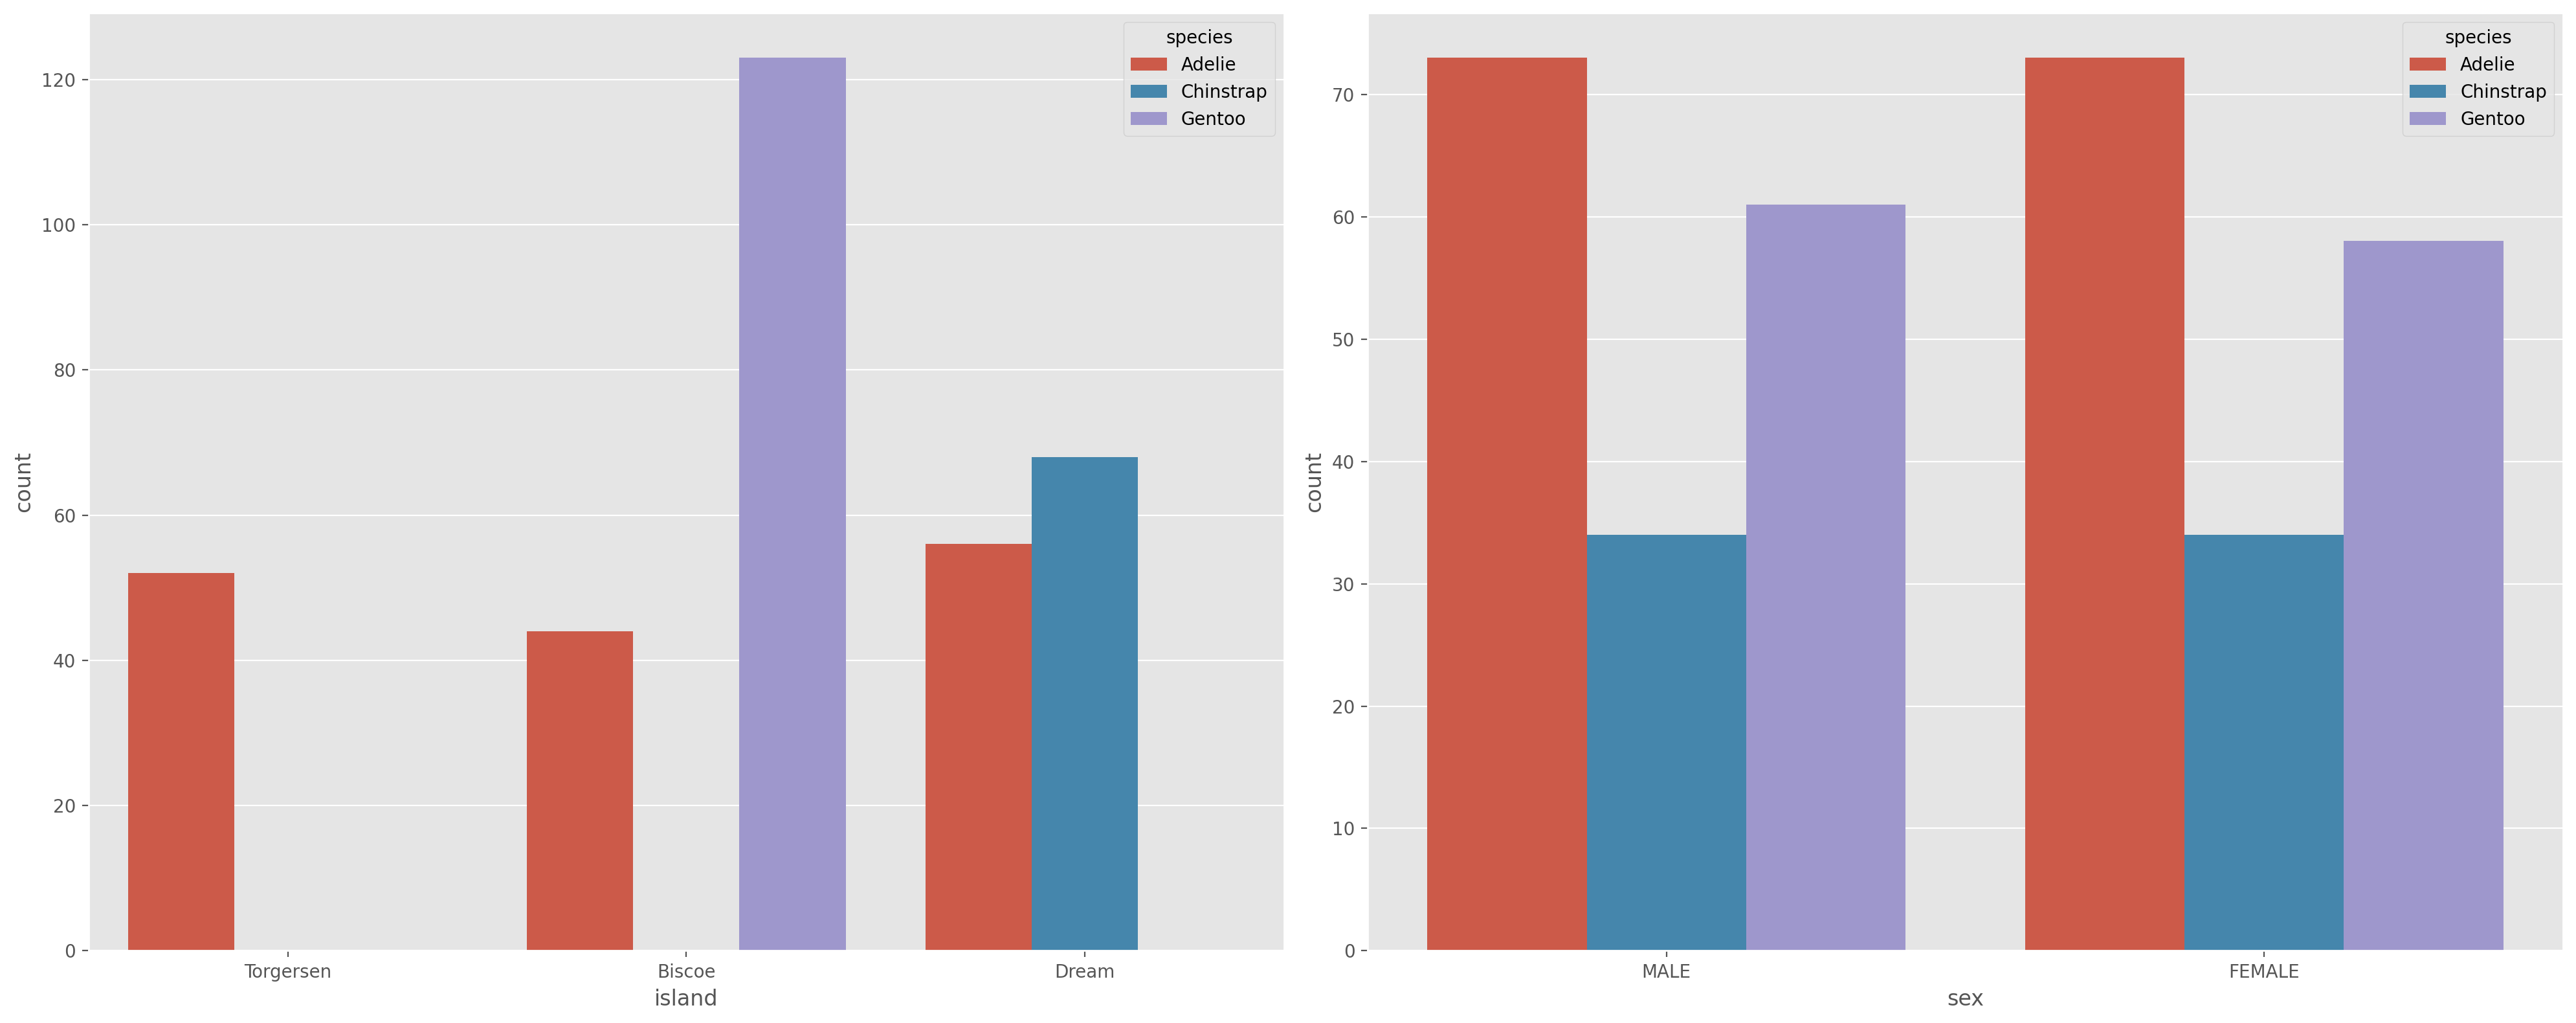

In [8]:
cols = ['island', 'sex']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=200)
ax = ax.flatten()

for i, var in enumerate(cols):
    sns.countplot(x=var, data=df, hue='species', ax=ax[i])
    
fig.tight_layout()

plt.show()

In [9]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

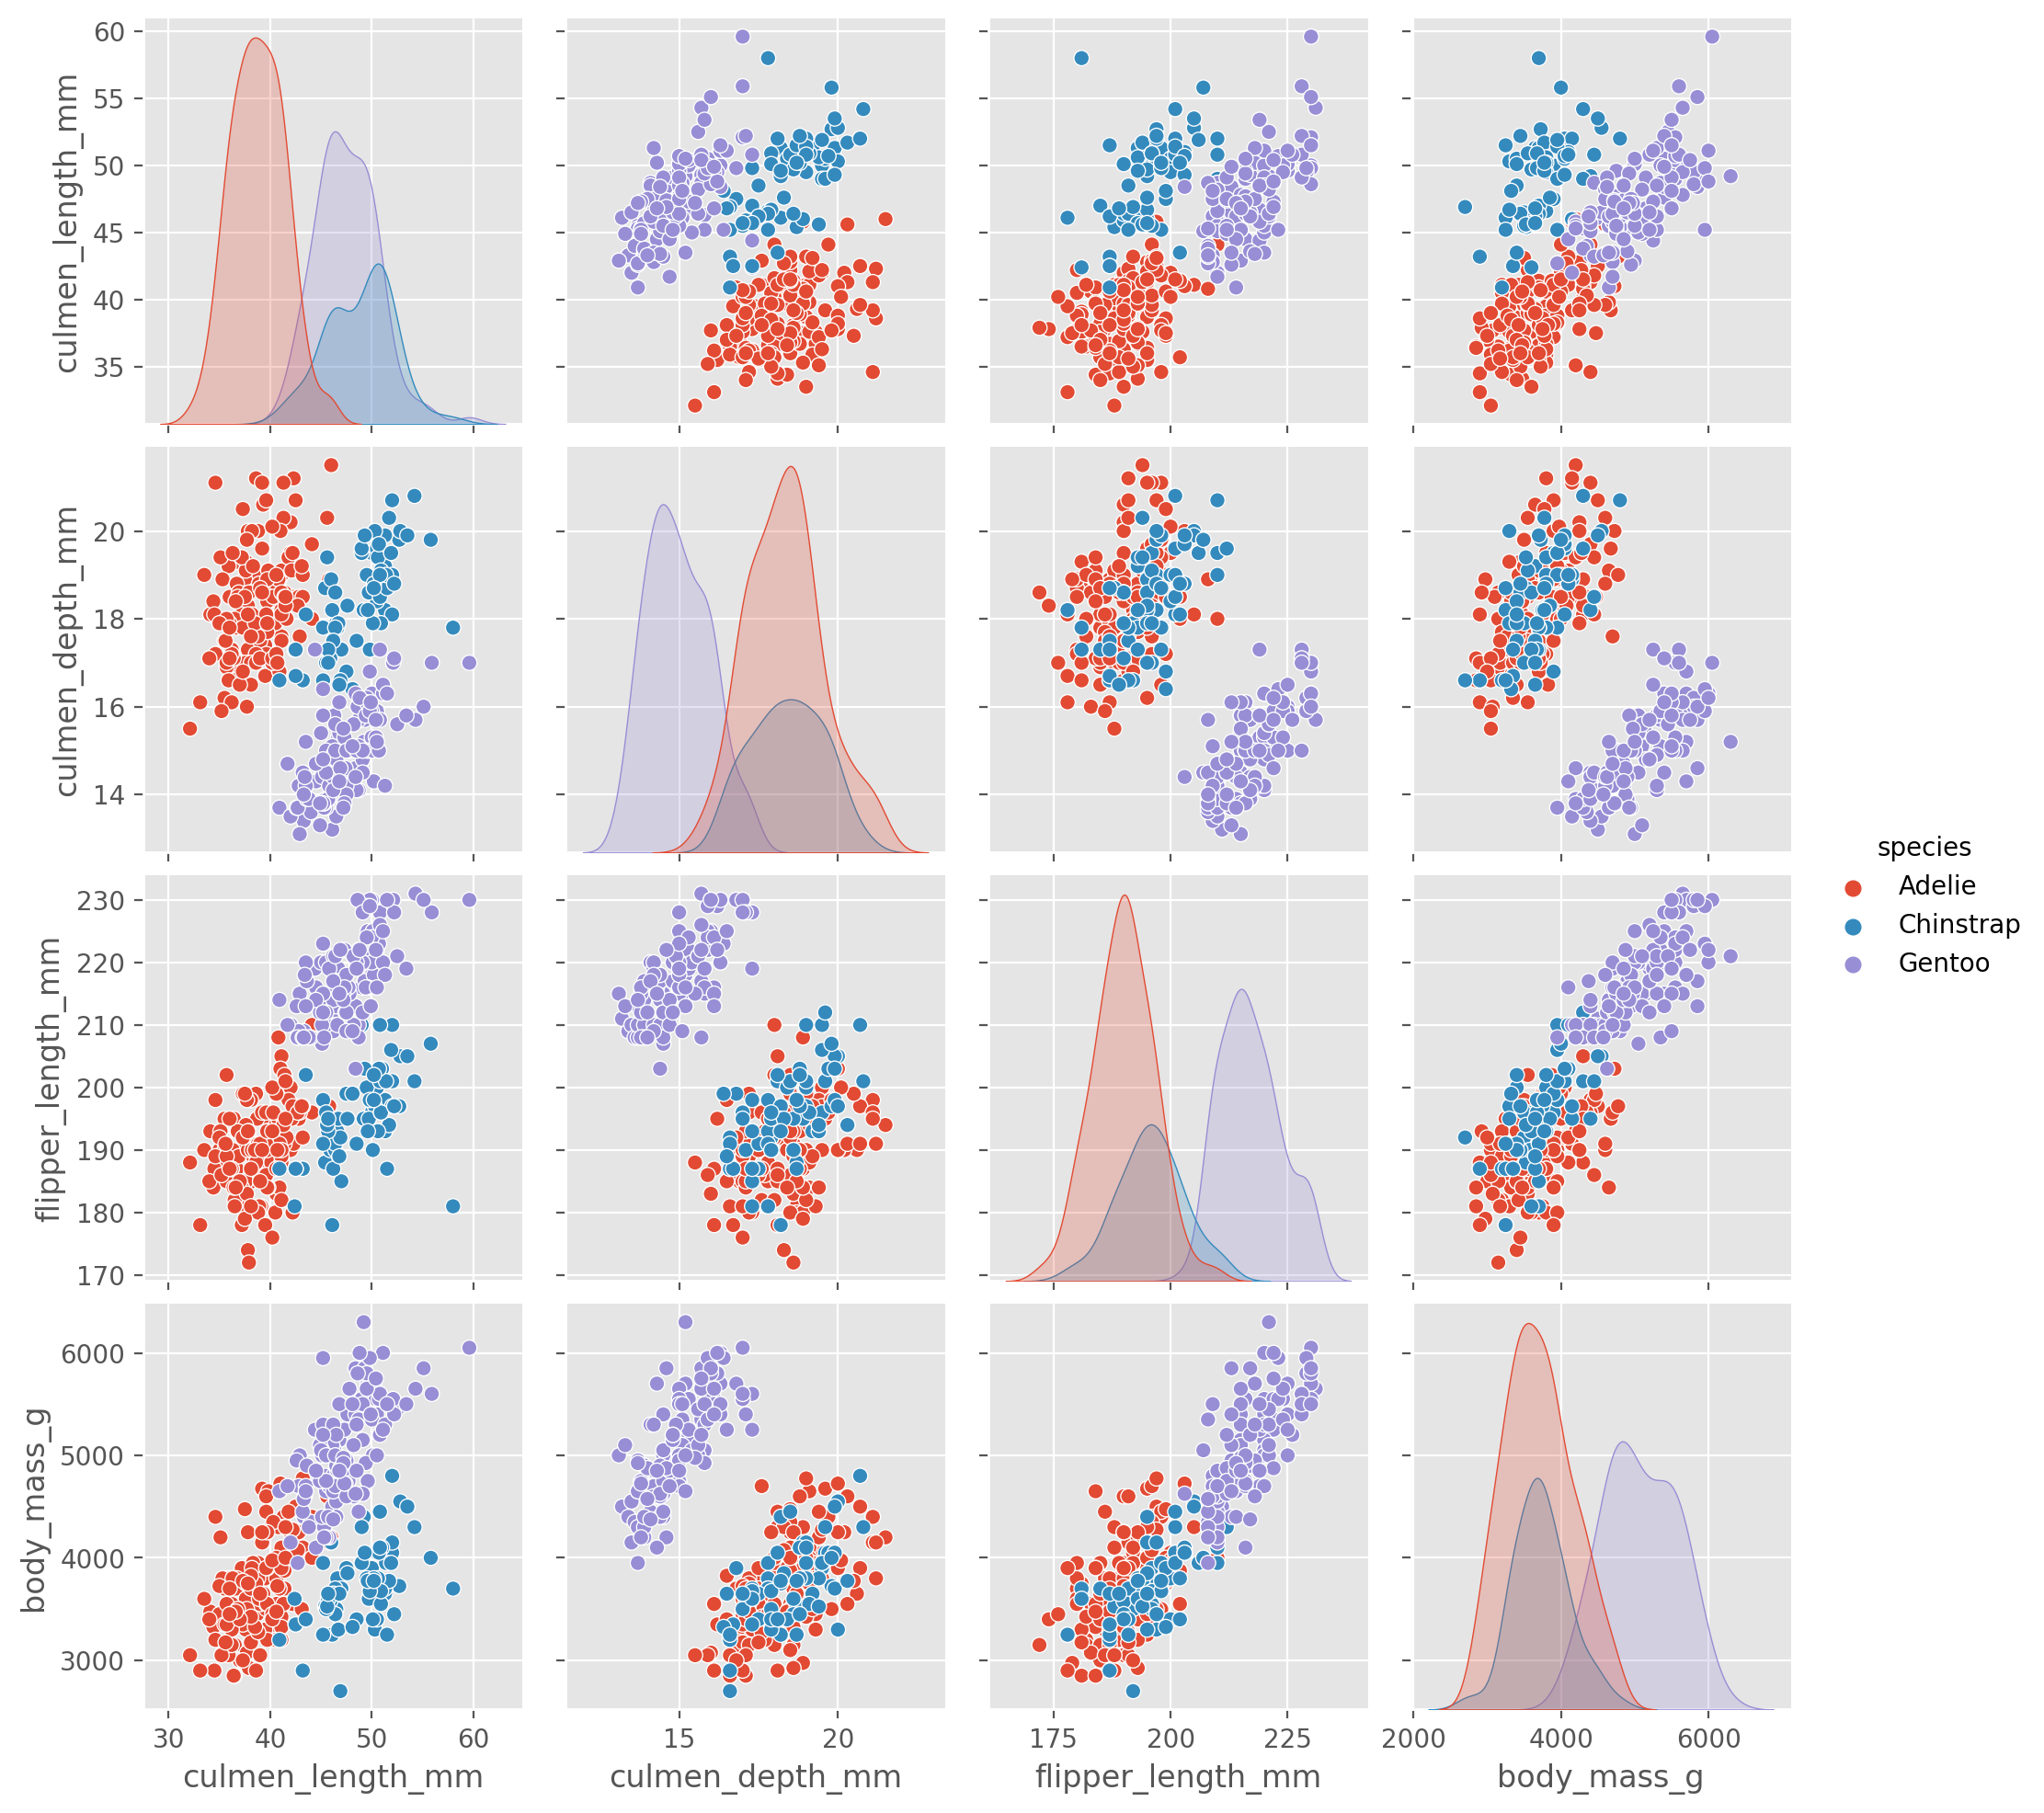

In [10]:
plt.rcParams['figure.figsize'] =(20, 16)
plt.rcParams['figure.dpi'] = 200

sns.pairplot(df, hue='species')

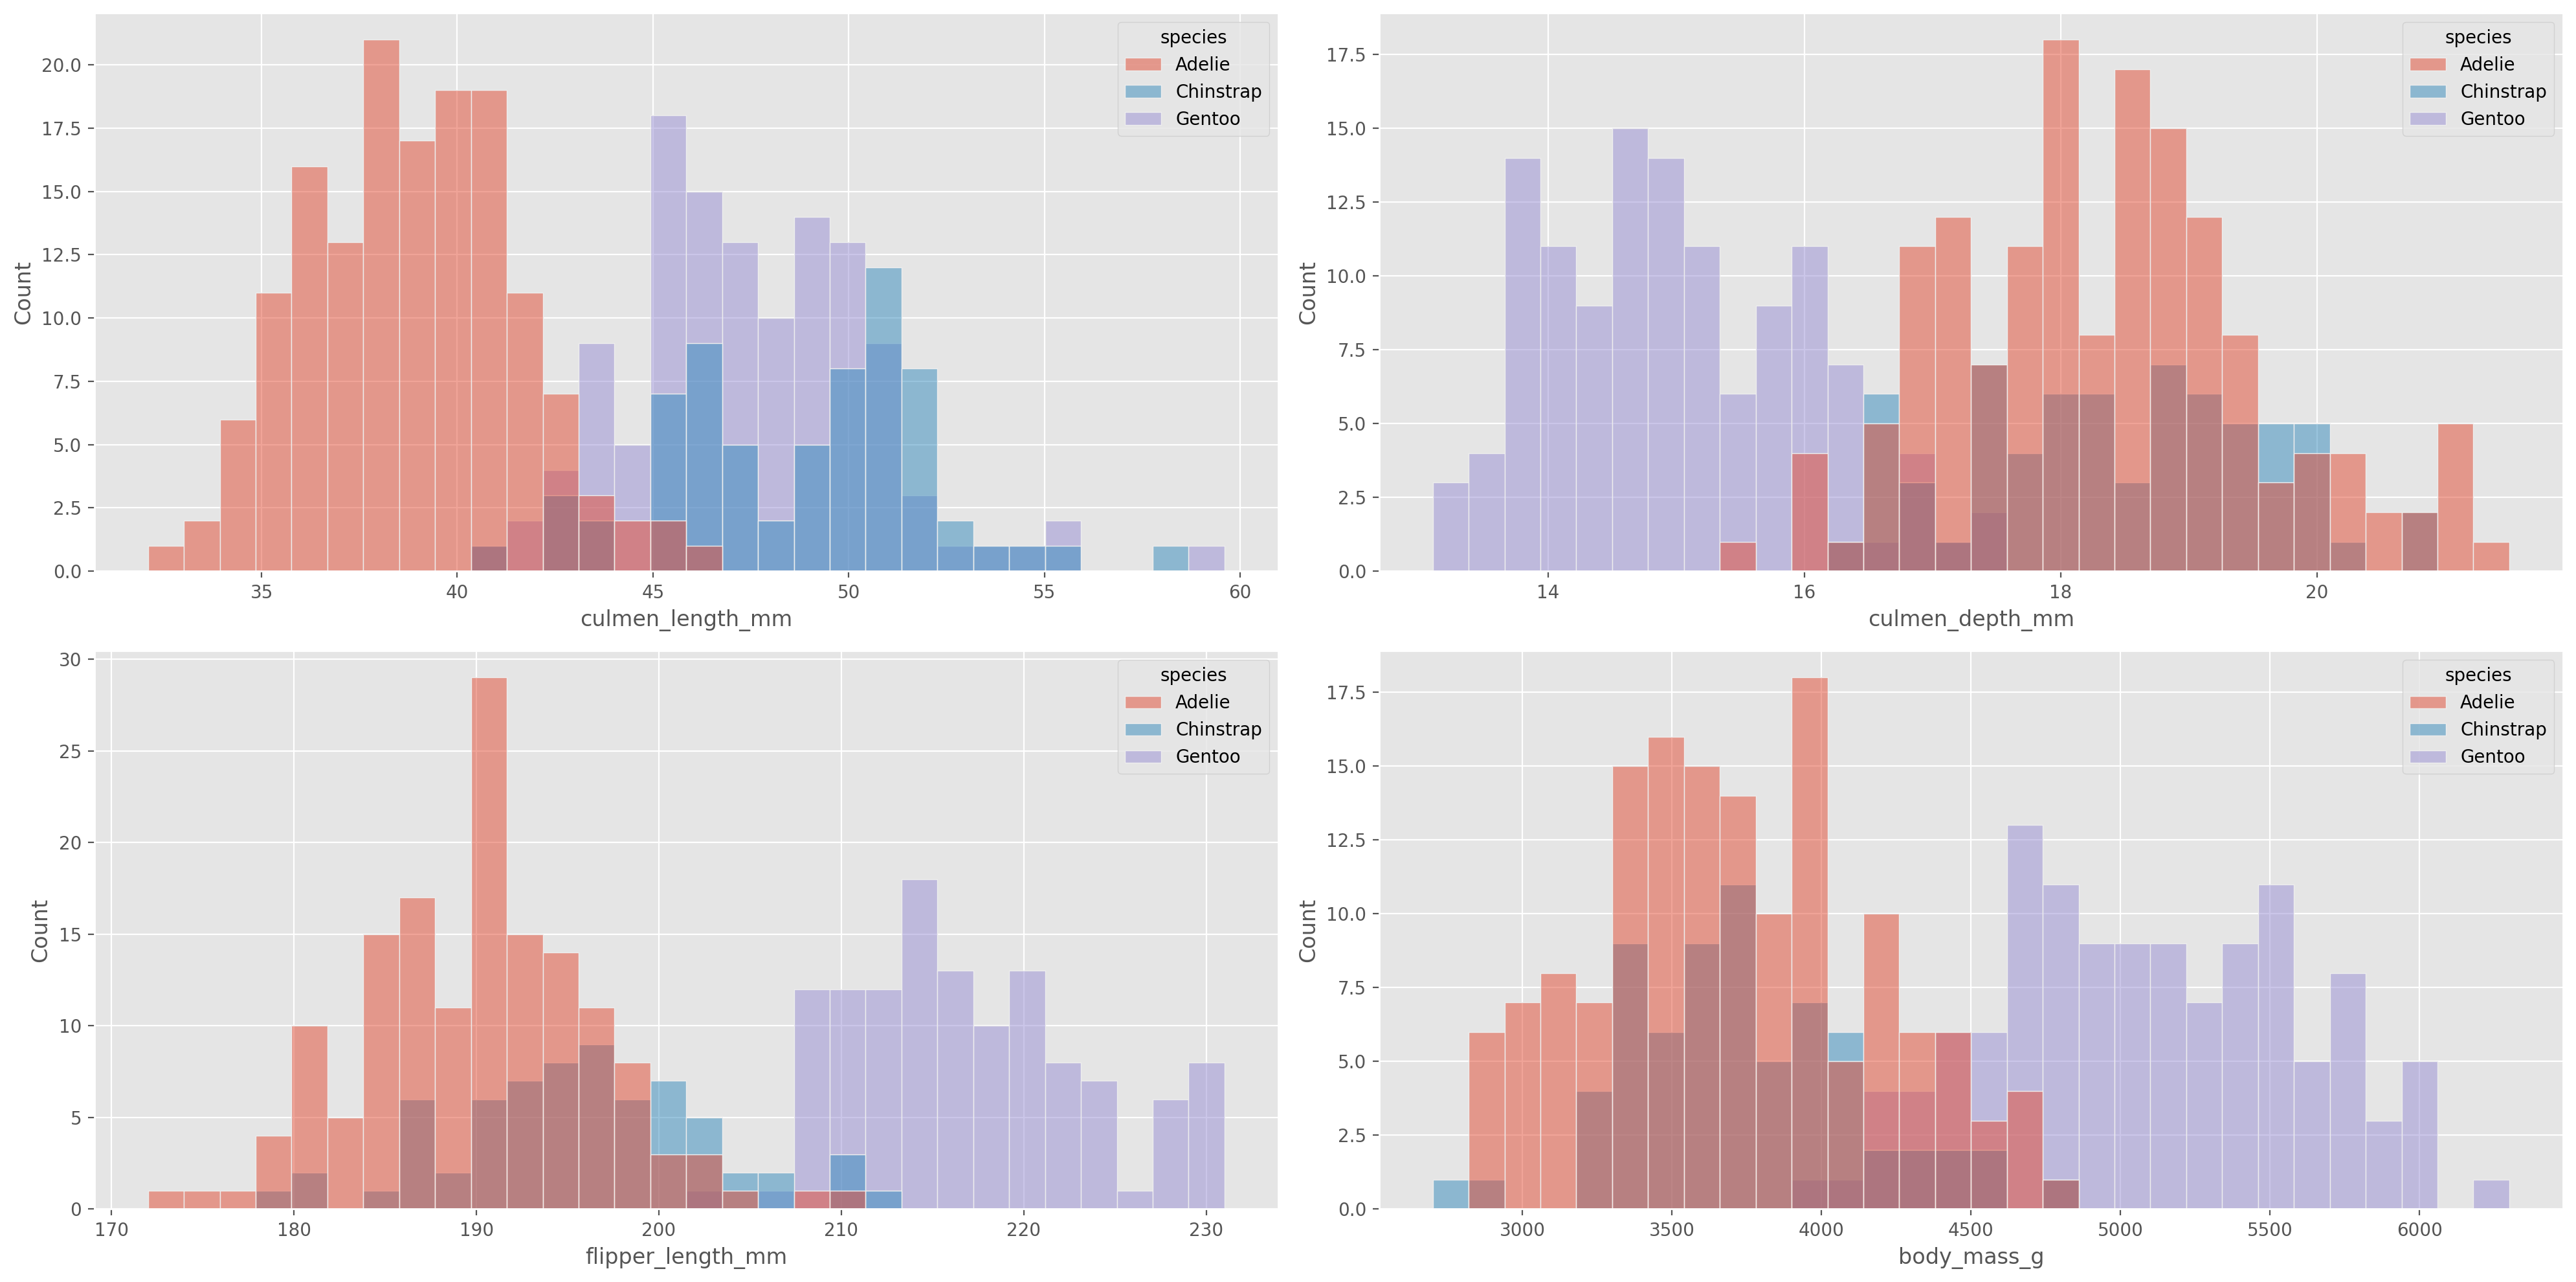

In [12]:
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), dpi=200)
ax = ax.flatten()

for i, var in enumerate(num_cols):
    sns.histplot(x=var, data=df, ax=ax[i], hue='species', bins=30, multiple='layer')
    
fig.tight_layout()

plt.show()

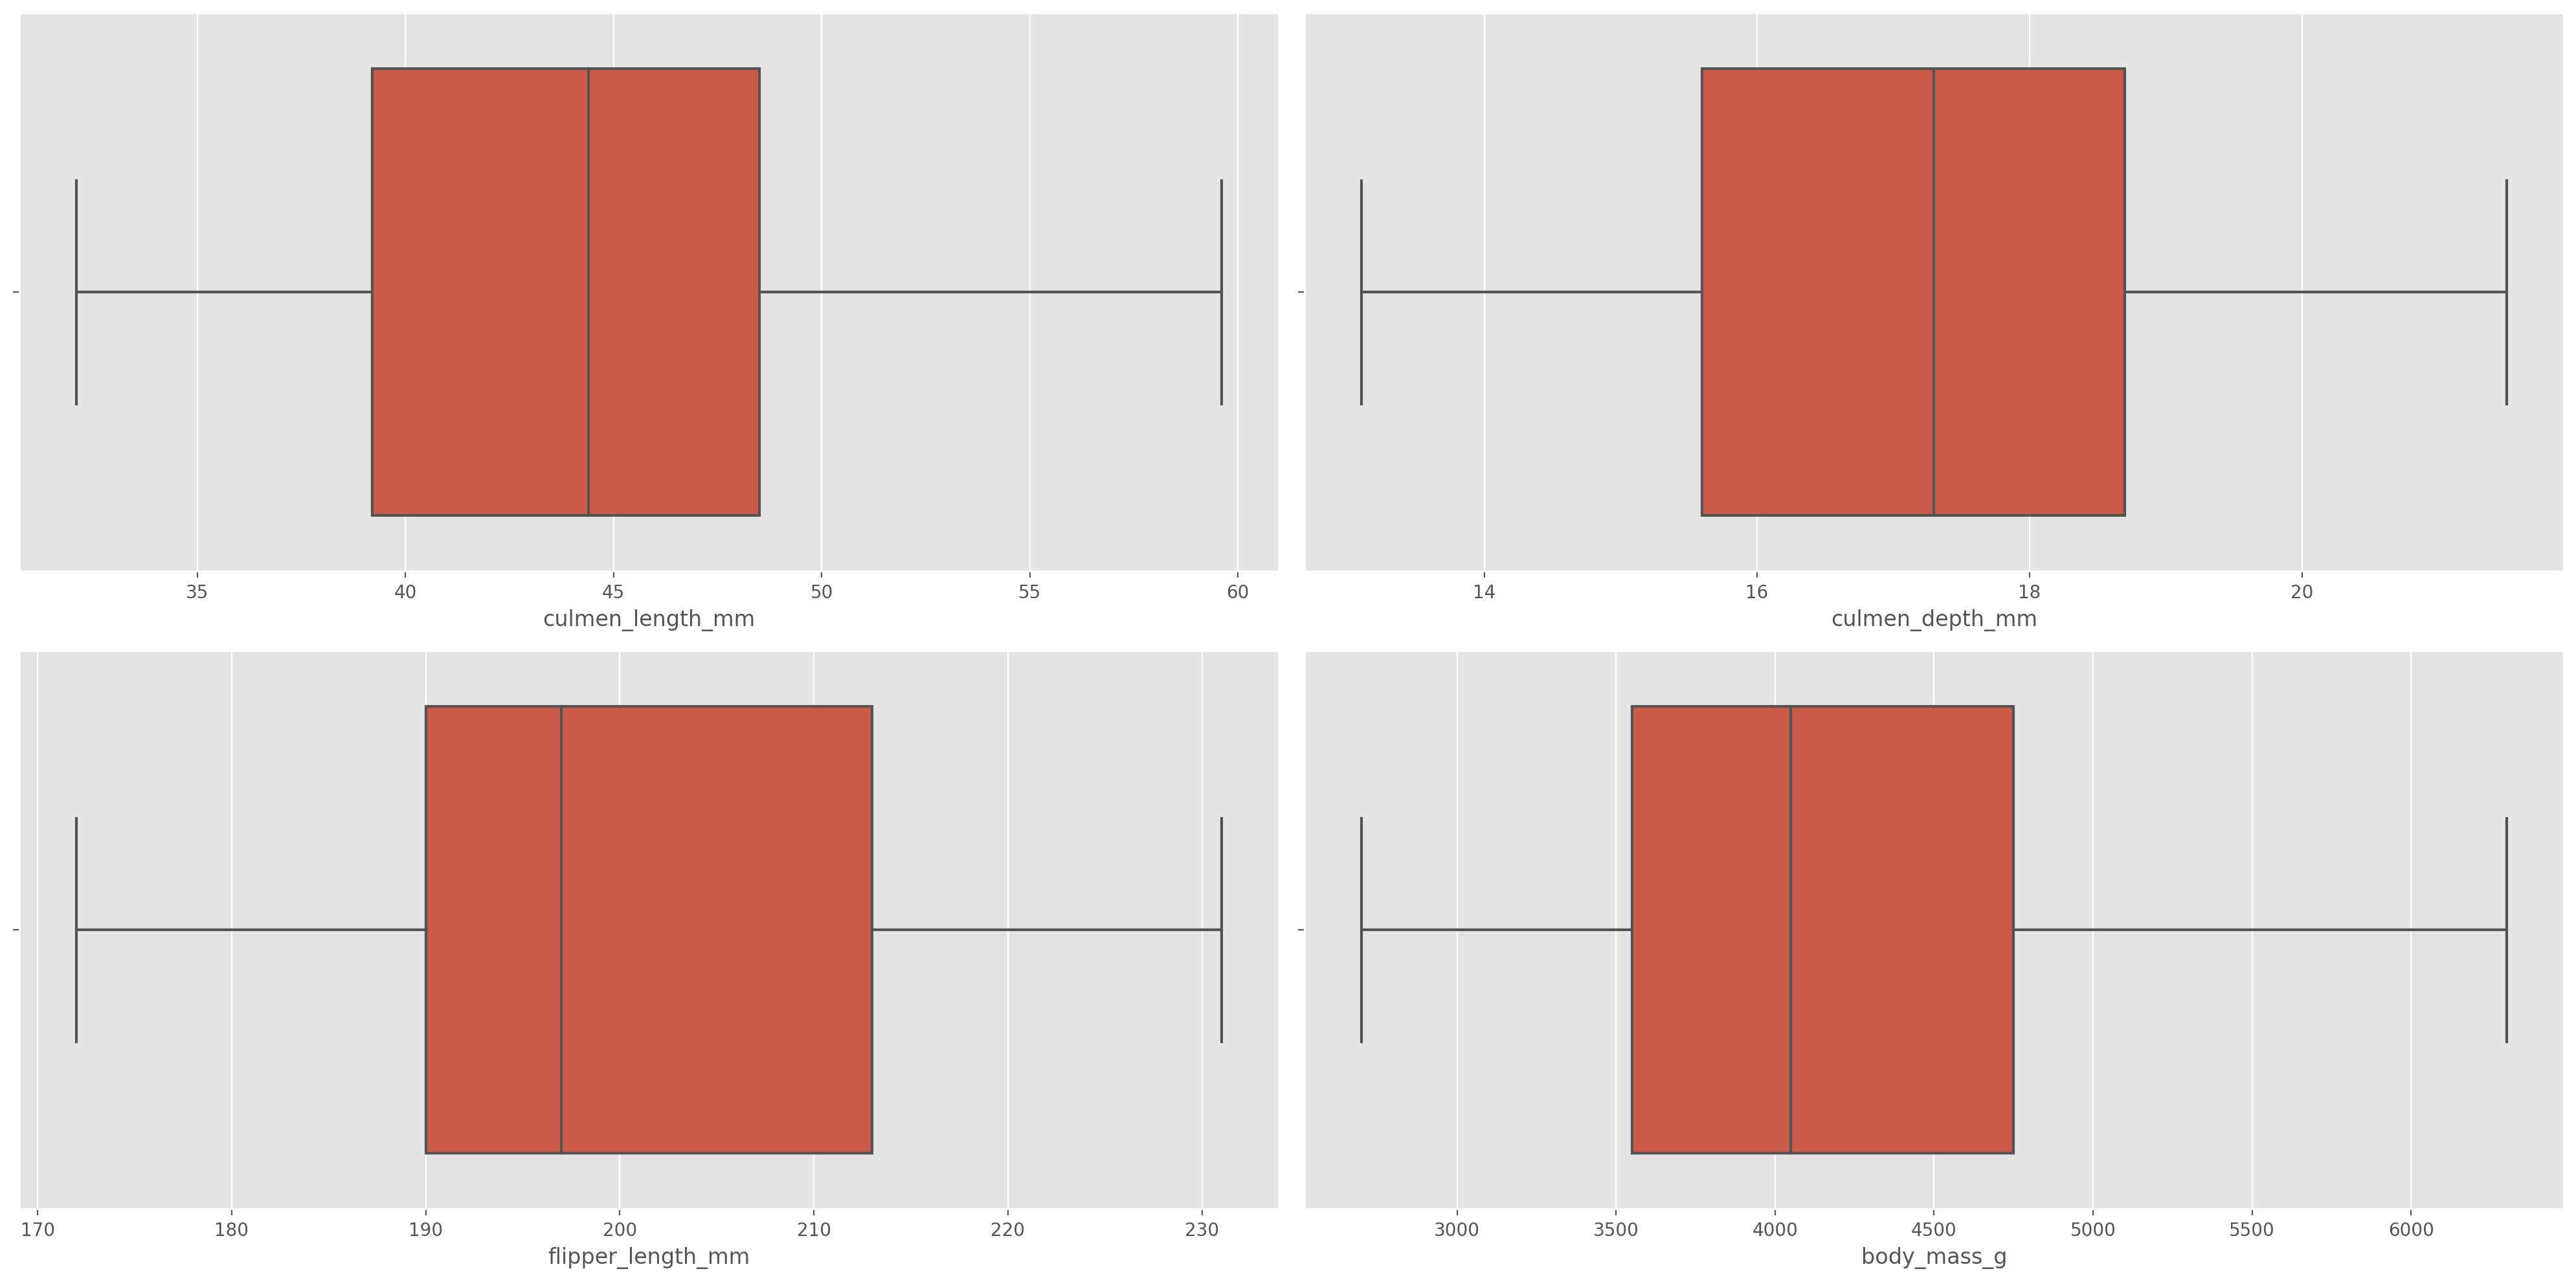

In [13]:
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), dpi=200)
ax = ax.flatten()

for i, var in enumerate(num_cols):
    sns.boxplot(x=var, data=df, ax=ax[i])
    
fig.tight_layout()

plt.show()

In [14]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
df.dropna(subset='sex', inplace=True)

# Train Test Split & One-Hot Encoding

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop('species', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['species']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building & Evaluation

In [19]:
from lazypredict.Supervised import LazyClassifier

In [22]:
lc = LazyClassifier(ignore_warnings=True)

models, predictions = lc.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.01it/s]


In [25]:
pd.DataFrame(models).head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.03
BaggingClassifier,1.00,1.00,None,1.00,0.08
SVC,1.00,1.00,None,1.00,0.02
SGDClassifier,1.00,1.00,None,1.00,0.03
RidgeClassifierCV,1.00,1.00,None,1.00,0.03


# LinearSVC

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

In [29]:
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [44]:
# Calculate permutation importances
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = df.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
importance_df

,Feature,Importance
0,species,0.19
5,body_mass_g,0.10
4,flipper_length_mm,0.07
1,island,0.06
2,culmen_length_mm,0.02
3,culmen_depth_mm,0.01
6,sex,0.00
